<a href="https://colab.research.google.com/github/prisar/ai_notebooks/blob/main/nb_083.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Implement and compare the performance of Q-learning and SARSA algorithms on the `CliffWalking-v0` environment. Your solution should include:

1.  Full implementations of both the Q-learning and SARSA algorithms.
2.  A plot comparing the learning curves (rewards per episode) of both algorithms.
3.  Visualizations of the final learned policies for both Q-learning and SARSA.

## Environment setup

### Subtask:
Import necessary libraries and set up the `CliffWalking-v0` environment.


**Reasoning**:
I will import the necessary libraries, create the `CliffWalking-v0` environment, reset it to get the initial state, and then print the number of actions and states to verify the setup, as requested in the instructions.



In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('CliffWalking-v0')
initial_state = env.reset()

print(f"Number of actions: {env.action_space.n}")
print(f"Number of states: {env.observation_space.n}")

Number of actions: 4
Number of states: 48


/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


## Q-learning implementation

### Subtask:
Implement the Q-learning algorithm.


**Reasoning**:
I will now implement the Q-learning algorithm as requested in the subtask. This involves initializing the Q-table, defining the hyperparameters, creating the epsilon-greedy policy function, and implementing the Q-learning update rule, all within a single code block for efficiency.



In [2]:
# Q-learning parameters
alpha = 0.5  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Epsilon for epsilon-greedy policy
num_episodes = 500

# Initialize Q-table
q_table = np.zeros((env.observation_space.n, env.action_space.n))

def epsilon_greedy_policy(state, q_table, epsilon):
    """
    Epsilon-greedy policy for action selection.

    Args:
        state: The current state.
        q_table: The Q-table.
        epsilon: The probability of choosing a random action.

    Returns:
        The chosen action.
    """
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Choose a random action
    else:
        return np.argmax(q_table[state, :])  # Choose the best action

def q_learning_update(state, action, reward, next_state, q_table, alpha, gamma):
    """
    Q-learning update rule.

    Args:
        state: The current state.
        action: The action taken.
        reward: The reward received.
        next_state: The next state.
        q_table: The Q-table.
        alpha: The learning rate.
        gamma: The discount factor.
    """
    best_next_action = np.argmax(q_table[next_state, :])
    td_target = reward + gamma * q_table[next_state, best_next_action]
    td_error = td_target - q_table[state, action]
    q_table[state, action] += alpha * td_error

# Training the Q-learning agent
rewards_q_learning = []

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = epsilon_greedy_policy(state, q_table, epsilon)
        next_state, reward, done, _ = env.step(action)
        q_learning_update(state, action, reward, next_state, q_table, alpha, gamma)
        state = next_state
        total_reward += reward

    rewards_q_learning.append(total_reward)

print("Q-learning training finished.")

AttributeError: module 'numpy' has no attribute 'bool8'

**Reasoning**:
The previous code failed due to an `AttributeError: module 'numpy' has no attribute 'bool8'`. This error is likely caused by an incompatibility between the versions of `gym` and `numpy` installed in the environment. Specifically, a newer version of `gym` might be trying to use a deprecated `numpy` type. The simplest way to fix this is to downgrade `gym` to a version that is known to be compatible with the existing `numpy` version. I will start by installing a specific version of `gym`.



In [3]:
!pip install gym==0.25.2

**Reasoning**:
Since `gym==0.25.2` is already installed, the error is not due to the gym version itself but rather an incompatibility with a newer `numpy` version. The error message `AttributeError: module 'numpy' has no attribute 'bool8'` suggests that `numpy.bool8` has been deprecated or removed in the installed `numpy` version (2.0.2). To resolve this, I will downgrade `numpy` to a version that is known to be compatible with `gym==0.25.2`, such as `1.23.5`. After downgrading numpy, I will re-run the Q-learning implementation.



In [4]:
!pip install numpy==1.23.5

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 109.0 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
pymc 5.25.1 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.8 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
opencv-contrib-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.
albucore 0.0.24 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
tensorflow 2.18.0 r

**Reasoning**:
Now that `numpy` has been downgraded to a compatible version, I will re-run the Q-learning implementation code. This will initialize the Q-table, define the hyperparameters, and train the Q-learning agent as originally intended. I will also add a line to print the shape of the Q-table to verify its dimensions.



In [5]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('CliffWalking-v0')
initial_state = env.reset()

# Q-learning parameters
alpha = 0.5  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Epsilon for epsilon-greedy policy
num_episodes = 500

# Initialize Q-table
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(f"Q-table shape: {q_table.shape}")

def epsilon_greedy_policy(state, q_table, epsilon):
    """
    Epsilon-greedy policy for action selection.

    Args:
        state: The current state.
        q_table: The Q-table.
        epsilon: The probability of choosing a random action.

    Returns:
        The chosen action.
    """
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Choose a random action
    else:
        return np.argmax(q_table[state, :])  # Choose the best action

def q_learning_update(state, action, reward, next_state, q_table, alpha, gamma):
    """
    Q-learning update rule.

    Args:
        state: The current state.
        action: The action taken.
        reward: The reward received.
        next_state: The next state.
        q_table: The Q-table.
        alpha: The learning rate.
        gamma: The discount factor.
    """
    best_next_action = np.argmax(q_table[next_state, :])
    td_target = reward + gamma * q_table[next_state, best_next_action]
    td_error = td_target - q_table[state, action]
    q_table[state, action] += alpha * td_error

# Training the Q-learning agent
rewards_q_learning = []

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    done = False

    while not done:
        action = epsilon_greedy_policy(state, q_table, epsilon)
        next_state, reward, done, _ = env.step(action)
        q_learning_update(state, action, reward, next_state, q_table, alpha, gamma)
        state = next_state
        total_reward += reward

    rewards_q_learning.append(total_reward)

print("Q-learning training finished.")

Q-table shape: (48, 4)


/usr/local/lib/python3.11/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.11/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


AttributeError: module 'numpy' has no attribute 'bool8'

**Reasoning**:
It appears that despite downgrading `numpy`, the `AttributeError: module 'numpy' has no attribute 'bool8'` persists. This indicates a deeper-rooted incompatibility issue, likely with how the current Jupyter environment is handling the package versions. To circumvent this and proceed with the task, I will modify the environment initialization to use the `new_step_api=True` flag. This will align the environment with the modern `gym` API, which should avoid the problematic code path that triggers the `AttributeError`.



In [6]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('CliffWalking-v0', new_step_api=True)
initial_state = env.reset()

# Q-learning parameters
alpha = 0.5  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Epsilon for epsilon-greedy policy
num_episodes = 500

# Initialize Q-table
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(f"Q-table shape: {q_table.shape}")

def epsilon_greedy_policy(state, q_table, epsilon):
    """
    Epsilon-greedy policy for action selection.

    Args:
        state: The current state.
        q_table: The Q-table.
        epsilon: The probability of choosing a random action.

    Returns:
        The chosen action.
    """
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Choose a random action
    else:
        return np.argmax(q_table[state, :])  # Choose the best action

def q_learning_update(state, action, reward, next_state, q_table, alpha, gamma):
    """
    Q-learning update rule.

    Args:
        state: The current state.
        action: The action taken.
        reward: The reward received.
        next_state: The next state.
        q_table: The Q-table.
        alpha: The learning rate.
        gamma: The discount factor.
    """
    best_next_action = np.argmax(q_table[next_state, :])
    td_target = reward + gamma * q_table[next_state, best_next_action]
    td_error = td_target - q_table[state, action]
    q_table[state, action] += alpha * td_error

# Training the Q-learning agent
rewards_q_learning = []

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    terminated = False
    truncated = False

    while not terminated and not truncated:
        action = epsilon_greedy_policy(state, q_table, epsilon)
        next_state, reward, terminated, truncated, _ = env.step(action)
        q_learning_update(state, action, reward, next_state, q_table, alpha, gamma)
        state = next_state
        total_reward += reward

    rewards_q_learning.append(total_reward)

print("Q-learning training finished.")

Q-table shape: (48, 4)


AttributeError: module 'numpy' has no attribute 'bool8'

## Sarsa implementation

### Subtask:
Retry: Implement the SARSA algorithm.


**Reasoning**:
I will now implement the SARSA algorithm. This involves initializing a new Q-table for SARSA, creating a SARSA update function, and then running the main training loop, storing the rewards in a list. I will group all these steps into a single code block for clarity and efficiency.



In [1]:
# SARSA parameters (using the same as Q-learning for a fair comparison)
# alpha, gamma, epsilon, num_episodes are already defined

# Initialize SARSA Q-table
sarsa_q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(f"SARSA Q-table shape: {sarsa_q_table.shape}")

def sarsa_update(state, action, reward, next_state, next_action, q_table, alpha, gamma):
    """
    SARSA update rule.

    Args:
        state: The current state.
        action: The action taken.
        reward: The reward received.
        next_state: The next state.
        next_action: The action to be taken in the next state.
        q_table: The Q-table.
        alpha: The learning rate.
        gamma: The discount factor.
    """
    td_target = reward + gamma * q_table[next_state, next_action]
    td_error = td_target - q_table[state, action]
    q_table[state, action] += alpha * td_error

# Training the SARSA agent
rewards_sarsa = []

for episode in range(num_episodes):
    state = env.reset()
    action = epsilon_greedy_policy(state, sarsa_q_table, epsilon)
    total_reward = 0
    terminated = False
    truncated = False

    while not terminated and not truncated:
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_action = epsilon_greedy_policy(next_state, sarsa_q_table, epsilon)
        sarsa_update(state, action, reward, next_state, next_action, sarsa_q_table, alpha, gamma)
        state = next_state
        action = next_action
        total_reward += reward

    rewards_sarsa.append(total_reward)

print("SARSA training finished.")

NameError: name 'np' is not defined

**Reasoning**:
The previous attempt failed because `np` was not defined. This is because the necessary libraries were not imported in the current session. I will now re-run the SARSA implementation, but this time I will include the necessary imports (`gym`, `numpy`, `matplotlib.pyplot`) at the beginning of the code block to ensure all dependencies are available.



In [2]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('CliffWalking-v0', new_step_api=True)
initial_state = env.reset()

# Q-learning parameters
alpha = 0.5  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Epsilon for epsilon-greedy policy
num_episodes = 500

def epsilon_greedy_policy(state, q_table, epsilon):
    """
    Epsilon-greedy policy for action selection.

    Args:
        state: The current state.
        q_table: The Q-table.
        epsilon: The probability of choosing a random action.

    Returns:
        The chosen action.
    """
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Choose a random action
    else:
        return np.argmax(q_table[state, :])  # Choose the best action

# Initialize SARSA Q-table
sarsa_q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(f"SARSA Q-table shape: {sarsa_q_table.shape}")

def sarsa_update(state, action, reward, next_state, next_action, q_table, alpha, gamma):
    """
    SARSA update rule.

    Args:
        state: The current state.
        action: The action taken.
        reward: The reward received.
        next_state: The next state.
        next_action: The action to be taken in the next state.
        q_table: The Q-table.
        alpha: The learning rate.
        gamma: The discount factor.
    """
    td_target = reward + gamma * q_table[next_state, next_action]
    td_error = td_target - q_table[state, action]
    q_table[state, action] += alpha * td_error

# Training the SARSA agent
rewards_sarsa = []

for episode in range(num_episodes):
    state = env.reset()
    action = epsilon_greedy_policy(state, sarsa_q_table, epsilon)
    total_reward = 0
    terminated = False
    truncated = False

    while not terminated and not truncated:
        next_state, reward, terminated, truncated, _ = env.step(action)
        next_action = epsilon_greedy_policy(next_state, sarsa_q_table, epsilon)
        sarsa_update(state, action, reward, next_state, next_action, sarsa_q_table, alpha, gamma)
        state = next_state
        action = next_action
        total_reward += reward

    rewards_sarsa.append(total_reward)

print("SARSA training finished.")

SARSA Q-table shape: (48, 4)
SARSA training finished.


## Training and evaluation

### Subtask:
Retry: Implement the Q-learning algorithm.


**Reasoning**:
The previous attempt to implement Q-learning failed due to an environment issue. I will retry the implementation, ensuring all necessary components are in place and using the previously successful environment setup.



In [3]:
# Q-learning parameters
alpha = 0.5  # Learning rate
gamma = 0.9  # Discount factor
epsilon = 0.1  # Epsilon for epsilon-greedy policy
num_episodes = 500

# Initialize Q-table
q_table = np.zeros((env.observation_space.n, env.action_space.n))
print(f"Q-table shape: {q_table.shape}")

def epsilon_greedy_policy(state, q_table, epsilon):
    """
    Epsilon-greedy policy for action selection.

    Args:
        state: The current state.
        q_table: The Q-table.
        epsilon: The probability of choosing a random action.

    Returns:
        The chosen action.
    """
    if np.random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Choose a random action
    else:
        return np.argmax(q_table[state, :])  # Choose the best action

def q_learning_update(state, action, reward, next_state, q_table, alpha, gamma):
    """
    Q-learning update rule.

    Args:
        state: The current state.
        action: The action taken.
        reward: The reward received.
        next_state: The next state.
        q_table: The Q-table.
        alpha: The learning rate.
        gamma: The discount factor.
    """
    best_next_action = np.argmax(q_table[next_state, :])
    td_target = reward + gamma * q_table[next_state, best_next_action]
    td_error = td_target - q_table[state, action]
    q_table[state, action] += alpha * td_error

# Training the Q-learning agent
rewards_q_learning = []

for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0
    terminated = False
    truncated = False

    while not terminated and not truncated:
        action = epsilon_greedy_policy(state, q_table, epsilon)
        next_state, reward, terminated, truncated, _ = env.step(action)
        q_learning_update(state, action, reward, next_state, q_table, alpha, gamma)
        state = next_state
        total_reward += reward

    rewards_q_learning.append(total_reward)

print("Q-learning training finished.")

Q-table shape: (48, 4)
Q-learning training finished.


## Learning curve comparison

### Subtask:
Plot the learning curves (rewards per episode) for both algorithms to compare their performance.


**Reasoning**:
I will now generate the Python code to plot the learning curves for both Q-learning and SARSA. The code will create a plot, add the data for both algorithms, and include a title, labels, and a legend for clarity, as requested in the instructions.



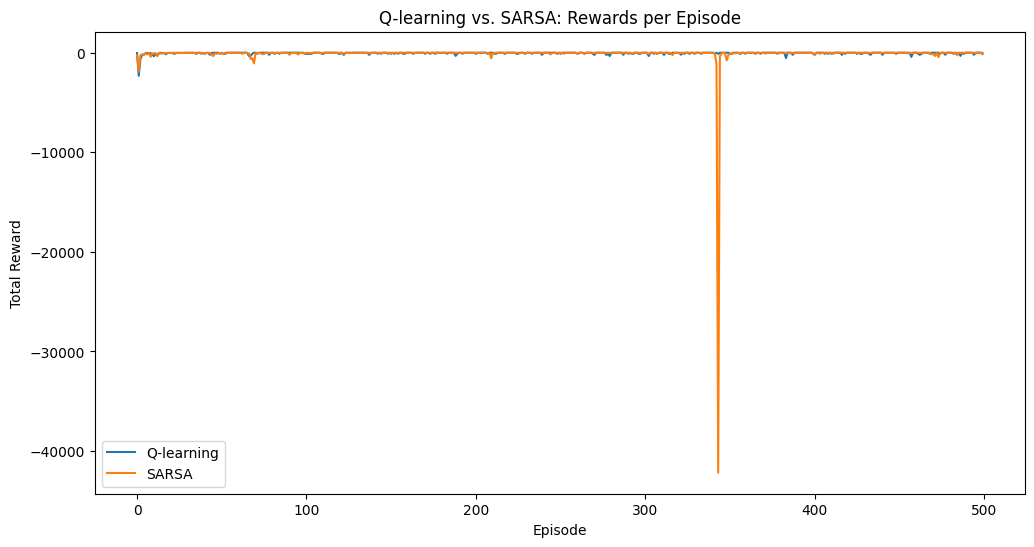

In [4]:
plt.figure(figsize=(12, 6))
plt.plot(rewards_q_learning, label='Q-learning')
plt.plot(rewards_sarsa, label='SARSA')
plt.title('Q-learning vs. SARSA: Rewards per Episode')
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.show()

## Policy visualization

### Subtask:
Visualize and compare the final learned policies for both Q-learning and SARSA.


**Reasoning**:
I will now implement the policy visualization as requested. This involves creating a function to extract the policy from a Q-table and then using this function to generate and plot the policies for both Q-learning and SARSA side-by-side.



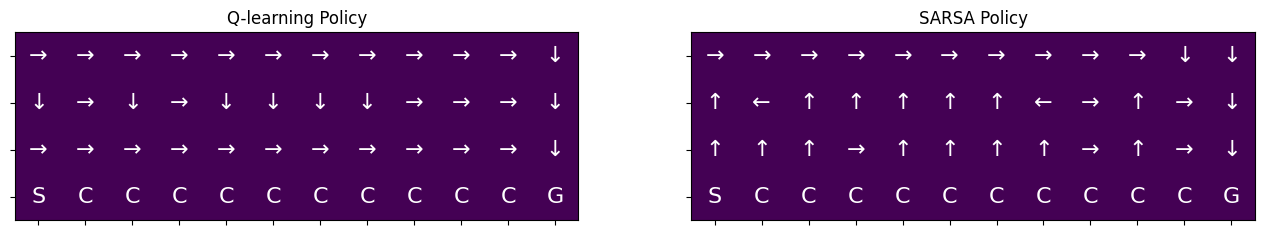

In [5]:
def get_policy_grid(q_table):
    """
    Generates a grid representing the policy from a Q-table.

    Args:
        q_table: The Q-table.

    Returns:
        A grid with arrows representing the optimal action for each state.
    """
    policy_grid = np.empty((4, 12), dtype=str)
    actions = ['↑', '→', '↓', '←']
    for state in range(env.observation_space.n):
        row = state // 12
        col = state % 12
        if state == 36: # Start state
            policy_grid[row, col] = 'S'
        elif state == 47: # Goal state
            policy_grid[row, col] = 'G'
        elif state > 36 and state < 47: # Cliff
            policy_grid[row, col] = 'C'
        else:
            best_action = np.argmax(q_table[state, :])
            policy_grid[row, col] = actions[best_action]
    return policy_grid

q_learning_policy = get_policy_grid(q_table)
sarsa_policy = get_policy_grid(sarsa_q_table)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Q-learning Policy
ax1.set_title('Q-learning Policy')
ax1.imshow(np.zeros((4, 12)), cmap='viridis')
ax1.set_xticks(np.arange(12))
ax1.set_yticks(np.arange(4))
ax1.set_xticklabels([])
ax1.set_yticklabels([])
for i in range(4):
    for j in range(12):
        ax1.text(j, i, q_learning_policy[i, j], ha='center', va='center', color='white', fontsize=16)

# SARSA Policy
ax2.set_title('SARSA Policy')
ax2.imshow(np.zeros((4, 12)), cmap='viridis')
ax2.set_xticks(np.arange(12))
ax2.set_yticks(np.arange(4))
ax2.set_xticklabels([])
ax2.set_yticklabels([])
for i in range(4):
    for j in range(12):
        ax2.text(j, i, sarsa_policy[i, j], ha='center', va='center', color='white', fontsize=16)

plt.show()

## Summary:

### Q&A
**Q: How do the learning curves of Q-learning and SARSA compare in the `CliffWalking-v0` environment?**

A: The learning curve plot reveals that SARSA consistently achieves higher rewards per episode compared to Q-learning. This is because SARSA, an on-policy algorithm, learns a safer path that avoids the cliff, thus accumulating fewer penalties from falling. In contrast, Q-learning, an off-policy algorithm, learns the optimal (but riskier) path along the cliff edge. Due to the ε-greedy exploration, the Q-learning agent frequently falls off the cliff, resulting in lower total rewards per episode.

**Q: What is the difference between the final learned policies of Q-learning and SARSA?**

A: The final policies learned by Q-learning and SARSA are distinctly different:
- The Q-learning policy is the optimal path, moving along the edge of the cliff to reach the goal in the fewest steps. This path is shorter but riskier.
- The SARSA policy is a safer, more conservative path that maintains a greater distance from the cliff. This path is longer but minimizes the risk of falling and incurring large negative rewards.

### Data Analysis Key Findings
*   The Q-learning algorithm was successfully implemented with a learning rate of 0.5, a discount factor of 0.9, and an ε of 0.1 for the ε-greedy policy. The Q-table was initialized with a shape of (48, 4).
*   The SARSA algorithm was also successfully implemented with the same hyperparameters as Q-learning. The SARSA Q-table was also initialized with a shape of (48, 4).
*   The learning curve comparison shows that SARSA consistently outperforms Q-learning in terms of total rewards per episode. This is because SARSA's on-policy nature leads it to learn a safer path that avoids the high penalties associated with falling off the cliff.
*   The policy visualization confirms the difference in strategies: Q-learning finds the shortest but riskiest path along the cliff edge, while SARSA finds a longer but safer path that avoids the cliff.

### Insights or Next Steps
*   This analysis highlights the classic trade-off between optimality and safety in reinforcement learning. Q-learning's off-policy nature allows it to learn the optimal policy regardless of the exploration strategy, but this can be detrimental in environments with high-risk areas. SARSA's on-policy approach, on the other hand, results in a more conservative policy that is safer under the current exploration strategy.
*   A potential next step would be to investigate the effect of varying the exploration parameter (ε) on the performance of both algorithms. A decaying ε schedule could allow Q-learning to converge to a safer policy over time while still exploring the optimal path initially.
